In [1]:
import syntheticModel, Hypercube, SepTensor
import geology
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def plot_slice(geomodel,inline_slice=64):
    vmin = np.percentile(geomodel.get('vp').getNdArray()[inline_slice],1)
    vmax = np.percentile(geomodel.get('vp').getNdArray()[inline_slice],99)
    plt.figure(figsize=(8,8))
    plt.imshow(geomodel.get('vp').getNdArray()[inline_slice].T,
              cmap='gray',
              vmin=vmin,vmax=vmax)
    ind = geomodel.getIndicatorI().getNdArray()
    mask = np.ma.masked_where(ind <=  0.03, ind)
    plt.imshow(
            mask[inline_slice].T,
            interpolation='none',
            aspect='auto',
            vmin=0,
            vmax=1,
            cmap='brg',
        )

    plt.figure(figsize=(8,8))
    plt.imshow(geomodel.get('vp').getNdArray()[inline_slice].T,
              cmap='gray',
              vmin=vmin,vmax=vmax)
    ind = geomodel.getIndicatorF().getNdArray()
    mask = np.ma.masked_where(ind <=  0.03, ind)
    plt.imshow(
            mask[inline_slice].T,
            interpolation='none',
            aspect='auto',
            vmin=0,
            vmax=1,
            cmap='brg',
        )

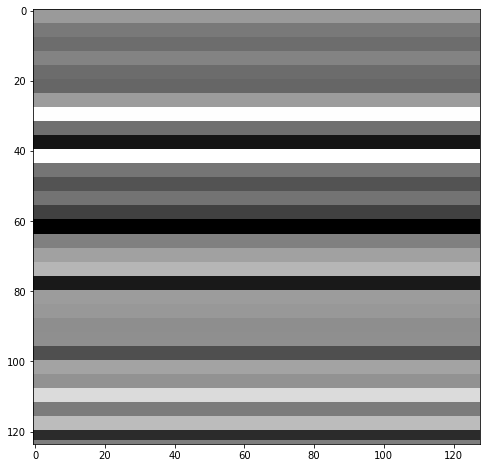

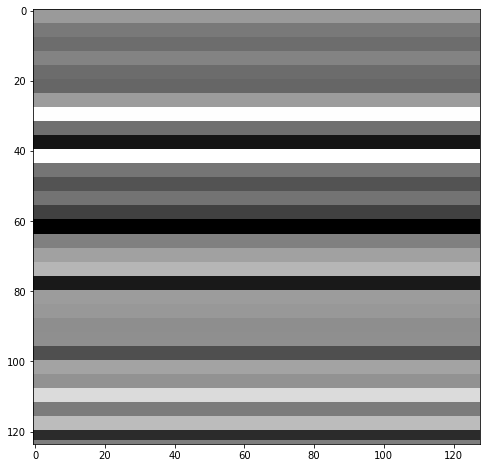

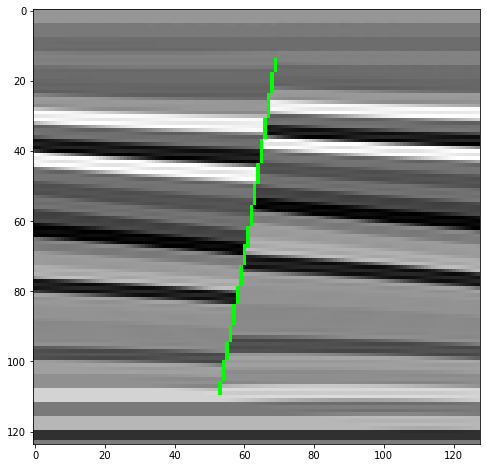

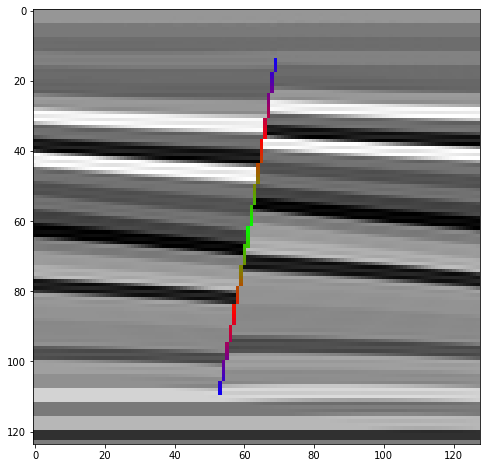

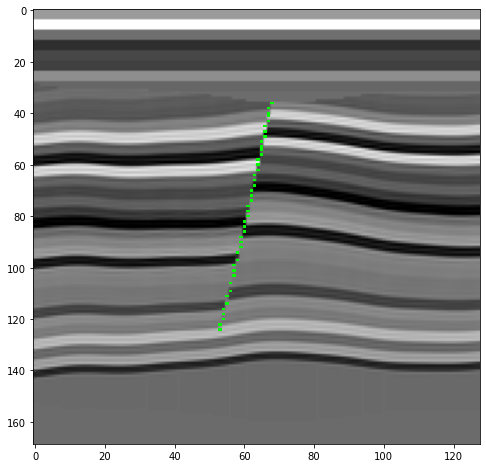

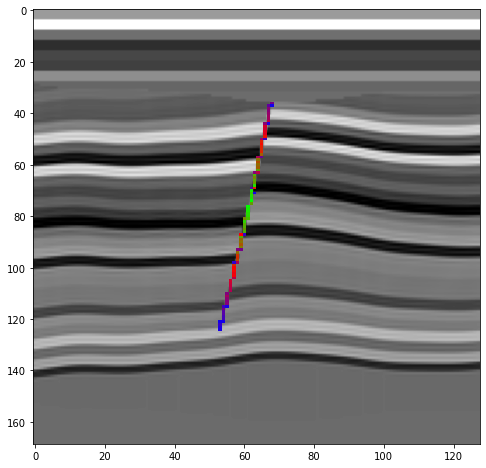

In [3]:
# make hypercude to describe initial model
x_axis = Hypercube.axis(n=128,
                        o=0.0,
                        d=1)
y_axis = Hypercube.axis(n=128,
                        o=0.0,
                        d=1)
z_axis = Hypercube.axis(n=50,
                        o=0.0,
                        d=1)
hyper = Hypercube.hypercube(axes=[z_axis, y_axis, x_axis])

# make synthetic model builder 
deposit_basement_vp = 2000
basement = {"vp": deposit_basement_vp}
primary = "vp"
geomodel = syntheticModel.geoModel(hyper, basement, primary, seed=100)

# deposit layer
geomodel = geology.deposit(geomodel,
                 prop=deposit_basement_vp,
                 thick=74,
                 interbedThick=3,
                 interbedThickVar=10,
                 interbedPropVar=100,
                 vp_var=0.0)
plot_slice(geomodel)
# add a fault 
geomodel = geology.fault(geomodel,
                 begx=0.5,
                 begy=0.5,
                 begz=0.5,
                 angle=10,
                 indicate=True,
                 radiusFreq=0.1,
                 ruptureLength=50,
                 extentInLine=75,
                 extentCrossLine=200,
                 shift=15,
                 radius=2000,
                 indicateF=True,indicateI=True)
plot_slice(geomodel)
# squish
geomodel = geology.squish(geomodel,
                max=50, 
                widthInline=250, 
                widthCrossline=250, 
                azimuth=0.0)
geomodel = geology.deposit(geomodel,
                 prop=deposit_basement_vp,
                 thick=1,
                 interbedThick=3,
                 interbedThickVar=10,
                 interbedPropVar=100,
                 vp_var=0.0)
plot_slice(geomodel)